In [1]:
#Libraries
!pip install cfbd

In [2]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cfbd

## **1.Fetch data using API**

In [3]:
#import time
api_url = "https://api.collegefootballdata.com/games"
api_key = "EVz+L65jldtrHvCQ+i0JdsT5L++1n0twubncnOC0GpnQ4cGuSSV1adci/xdbESyI"
# Set the Bearer token
headers = {
    "Authorization": f"Bearer {api_key} ",
}
#

In [4]:
# Initialize an empty list to store all the data
alldata = []

# Iterate from 2013 to 2022
for year in range(2013, 2023 + 1):
    # Define query parameters (start_date and end_date for the time slot)
    params = {
        'year': year
    }

    try:
        # Make a GET request to the API with headers and parameters
        response = requests.get(api_url, headers=headers, params=params)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()
            
            # Extend the alldata list with data for the current year
            alldata.extend(data)
        else:
            # Print an error message if the request was not successful
            print(f"Error: Unable to fetch data for year {year}. Status Code:", response.status_code)

    except Exception as e:
        # Handle exceptions, if any
        print(f"An error occurred for year {year}:", str(e))

# Print or further process the combined data
print(json.dumps(alldata, indent=4))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
#jd=json.loads(data)
df = pd.DataFrame(alldata)

In [6]:
df.head

<bound method NDFrame.head of               id  season  week season_type                start_date  \
0      332412309    2013     1     regular  2013-08-29T22:00:00.000Z   
1      332412579    2013     1     regular  2013-08-29T22:00:00.000Z   
2      332410154    2013     1     regular  2013-08-29T22:30:00.000Z   
3      332412710    2013     1     regular  2013-08-29T23:00:00.000Z   
4      332412116    2013     1     regular  2013-08-29T23:00:00.000Z   
...          ...     ...   ...         ...                       ...   
20836  401520444    2023    13     regular  2023-11-25T20:30:00.000Z   
20837  401520437    2023    13     regular  2023-11-25T21:00:00.000Z   
20838  401532630    2023    13     regular  2023-11-26T02:00:00.000Z   
20839  401532626    2023    13     regular  2023-11-26T04:00:00.000Z   
20840  401520445    2023    15     regular  2023-12-09T20:00:00.000Z   

      start_time_tbd  completed  neutral_site  conference_game  attendance  \
0              False       

In [7]:
df.shape

(20841, 33)

In [8]:
df.to_csv('football_data.csv', index=False)


In [104]:
df.columns

Index(['id', 'season', 'week', 'season_type', 'start_date', 'start_time_tbd',
       'completed', 'neutral_site', 'conference_game', 'attendance',
       'venue_id', 'venue', 'home_id', 'home_team', 'home_conference',
       'home_division', 'home_points', 'home_line_scores',
       'home_post_win_prob', 'home_pregame_elo', 'home_postgame_elo',
       'away_id', 'away_team', 'away_conference', 'away_division',
       'away_points', 'away_line_scores', 'away_post_win_prob',
       'away_pregame_elo', 'away_postgame_elo', 'excitement_index',
       'highlights', 'notes'],
      dtype='object')

In [106]:
df.isnull().sum()

id                        0
season                    0
week                      0
season_type               0
start_date                0
start_time_tbd         5105
completed                 0
neutral_site              0
conference_game           0
attendance            12563
venue_id                123
venue                   123
home_id                   0
home_team                 0
home_conference          54
home_division            54
home_points            1797
home_line_scores       1797
home_post_win_prob    11578
home_pregame_elo      12785
home_postgame_elo     13217
away_id                   0
away_team                 0
away_conference         335
away_division           335
away_points            1797
away_line_scores       1797
away_post_win_prob    11578
away_pregame_elo      13021
away_postgame_elo     13453
excitement_index      12416
highlights            17628
notes                 19715
dtype: int64

# 2.Export the college_football_data.csv to mysql workbench manually through wizard
I create database through python code ,but import the data with their ctable name manually in my MYSQL workbench

In [9]:
!pip install mysql-connector-python


  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/24/02/a5b6271da75cd7f67d9ec834cd79c8d65c1329e1eddfb707c56ded963d3d/mysql_connector_python-8.1.0-cp38-cp38-win_amd64.whl.metadata
     ---------------------------------------- 0.0/527.0 kB ? eta -:--:--
      --------------------------------------- 10.2/527.0 kB ? eta -:--:--
     -- ---------------------------------- 30.7/527.0 kB 435.7 kB/s eta 0:00:02
     -- ---------------------------------- 41.0/527.0 kB 326.8 kB/s eta 0:00:02
     ---- -------------------------------- 61.4/527.0 kB 409.6 kB/s eta 0:00:02
     ---------- ------------------------- 153.6/527.0 kB 762.6 kB/s eta 0:00:01
     -------------------- ----------------- 286.7/527.0 kB 1.2 MB/s eta 0:00:01
     ---------------------- --------------- 317.4/527.0 kB 1.0 MB/s eta 0:00:01
     ---------------------------------- --- 481.3/527.0 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 527.0/527.0 k

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.5 requires protobuf<4,>=3.11, but you have protobuf 4.21.12 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.
tensorflow 2.9.1 requires flatbuffers<2,>=1.12, but you have flatbuffers 23.5.26 which is incompatible.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.


In [107]:
import mysql.connector
from mysql.connector import Error

In [3]:
csv_file_path = 'football_data.csv'
data = pd.read_csv(csv_file_path)
data

C:\Users\ASIM\AppData\Local\Temp\ipykernel_7748\3309586768.py:2: DtypeWarning: Columns (5,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file_path)


,id,season,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,...,away_conference,away_division,away_points,away_line_scores,away_post_win_prob,away_pregame_elo,away_postgame_elo,excitement_index,highlights,notes
0,332412309,2013,1,regular,2013-08-29T22:00:00.000Z,False,True,False,False,20790.0,...,Big South,fcs,10.0,"[0, 3, 7, 0]",0.603843,1467.0,1461.0,NaN,NaN,NaN
1,332412579,2013,1,regular,2013-08-29T22:00:00.000Z,NaN,True,False,False,81572.0,...,ACC,fbs,10.0,"[0, 7, 3, 0]",0.344414,1638.0,1612.0,NaN,NaN,NaN
2,332410154,2013,1,regular,2013-08-29T22:30:00.000Z,False,True,False,False,26202.0,...,Big South,fcs,7.0,"[7, 0, 0, 0]",0.000211,NaN,NaN,NaN,NaN,NaN
3,332412710,2013,1,regular,2013-08-29T23:00:00.000Z,False,True,False,False,NaN,...,MEAC,fcs,9.0,"[0, 6, 0, 3]",NaN,NaN,NaN,NaN,NaN,NaN
4,332412116,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,True,False,False,35115.0,...,Mid-American,fbs,7.0,"[0, 0, 0, 7]",0.004920,1144.0,1119.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20836,401520444,2023,13,regular,2023-11-25T20:30:00.000Z,False,False,False,True,NaN,...,Conference USA,fbs,NaN,NaN,NaN,1572.0,NaN,NaN,NaN,NaN
20837,401520437,2023,13,regular,2023-11-25T21:00:00.000Z,False,False,False,True,NaN,...,Conference USA,fbs,NaN,NaN,NaN,1538.0,NaN,NaN,NaN,NaN
20838,401532630,2023,13,regular,2023-11-26T02:00:00.000Z,False,False,False,True,NaN,...,Mountain West,fbs,NaN,NaN,NaN,1418.0,NaN,NaN,NaN,NaN
20839,401532626,2023,13,regular,2023-11-26T04:00:00.000Z,False,False,False,True,NaN,...,Mountain West,fbs,NaN,NaN,NaN,1260.0,NaN,NaN,NaN,NaN


In [109]:
username = 'root'
password = 'root'
host = '127.0.0.1'
#port = '3306'
database_name = 'games'

# Create a connection to the database
connection = mysql.connector.connect(user=username, password=password, host=host, port=port, database=database_name)
cursor = connection.cursor()

In [110]:
# Execute SQL queries using cursor.execute()
cursor.execute("SELECT * FROM football_data")

# Fetch and print the result
result = cursor.fetchall()
df2 = pd.DataFrame(result,columns=['id', 'season', 'week', 'season_type', 'start_date', 'start_time_tbd',
       'completed', 'neutral_site', 'conference_game', 'attendance',
       'venue_id', 'venue', 'home_id', 'home_team', 'home_conference',
       'home_division', 'home_points', 'home_line_scores',
       'home_post_win_prob', 'home_pregame_elo', 'home_postgame_elo',
       'away_id', 'away_team', 'away_conference', 'away_division',
       'away_points', 'away_line_scores', 'away_post_win_prob',
       'away_pregame_elo', 'away_postgame_elo', 'excitement_index',
       'highlights', 'notes']) 




In [112]:
df2.head()

,id,season,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,...,away_conference,away_division,away_points,away_line_scores,away_post_win_prob,away_pregame_elo,away_postgame_elo,excitement_index,highlights,notes
0,332412309,2013,1,regular,2013-08-29T22:00:00.000Z,False,True,False,False,20790.0,...,Big South,fcs,10.0,"[0, 3, 7, 0]",0.6038425390589921,1467.0,1461.0,,,
1,332412579,2013,1,regular,2013-08-29T22:00:00.000Z,,True,False,False,81572.0,...,ACC,fbs,10.0,"[0, 7, 3, 0]",0.3444138448668871,1638.0,1612.0,,,
2,332410154,2013,1,regular,2013-08-29T22:30:00.000Z,False,True,False,False,26202.0,...,Big South,fcs,7.0,"[7, 0, 0, 0]",0.00021090286491187715,,,,,
3,332412710,2013,1,regular,2013-08-29T23:00:00.000Z,False,True,False,False,,...,MEAC,fcs,9.0,"[0, 6, 0, 3]",,,,,,
4,332412116,2013,1,regular,2013-08-29T23:00:00.000Z,,True,False,False,35115.0,...,Mid-American,fbs,7.0,"[0, 0, 0, 7]",0.004920378920123536,1144.0,1119.0,,,


In [114]:
df2.isnull().sum()

id                    0
season                0
week                  0
season_type           0
start_date            0
start_time_tbd        0
completed             0
neutral_site          0
conference_game       0
attendance            0
venue_id              0
venue                 0
home_id               0
home_team             0
home_conference       0
home_division         0
home_points           0
home_line_scores      0
home_post_win_prob    0
home_pregame_elo      0
home_postgame_elo     0
away_id               0
away_team             0
away_conference       0
away_division         0
away_points           0
away_line_scores      0
away_post_win_prob    0
away_pregame_elo      0
away_postgame_elo     0
excitement_index      0
highlights            0
notes                 0
dtype: int64

# Here I analyze that we have no null values in our data but that is incorrect,our data has lot more null values as we seen above.
We need to clean data first than import to database or after saving our csv data to database we can make analysis further on csv
Data
Which I done here

In [115]:
#Close the connection
connection.commit()
cursor.close()
connection.close()

# 3. Data Preprocessing

In [4]:
#for analysis I use the csv file and pandas
data.head()

,id,season,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,...,away_conference,away_division,away_points,away_line_scores,away_post_win_prob,away_pregame_elo,away_postgame_elo,excitement_index,highlights,notes
0,332412309,2013,1,regular,2013-08-29T22:00:00.000Z,False,True,False,False,20790.0,...,Big South,fcs,10.0,"[0, 3, 7, 0]",0.603843,1467.0,1461.0,NaN,NaN,NaN
1,332412579,2013,1,regular,2013-08-29T22:00:00.000Z,NaN,True,False,False,81572.0,...,ACC,fbs,10.0,"[0, 7, 3, 0]",0.344414,1638.0,1612.0,NaN,NaN,NaN
2,332410154,2013,1,regular,2013-08-29T22:30:00.000Z,False,True,False,False,26202.0,...,Big South,fcs,7.0,"[7, 0, 0, 0]",0.000211,NaN,NaN,NaN,NaN,NaN
3,332412710,2013,1,regular,2013-08-29T23:00:00.000Z,False,True,False,False,NaN,...,MEAC,fcs,9.0,"[0, 6, 0, 3]",NaN,NaN,NaN,NaN,NaN,NaN
4,332412116,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,True,False,False,35115.0,...,Mid-American,fbs,7.0,"[0, 0, 0, 7]",0.004920,1144.0,1119.0,NaN,NaN,NaN


In [5]:
data.isnull().sum()

id                        0
season                    0
week                      0
season_type               0
start_date                0
start_time_tbd         5105
completed                 0
neutral_site              0
conference_game           0
attendance            12563
venue_id                123
venue                   123
home_id                   0
home_team                 0
home_conference          54
home_division            54
home_points            1797
home_line_scores       1797
home_post_win_prob    11578
home_pregame_elo      12785
home_postgame_elo     13217
away_id                   0
away_team                 0
away_conference         335
away_division           335
away_points            1797
away_line_scores       1797
away_post_win_prob    11578
away_pregame_elo      13021
away_postgame_elo     13453
excitement_index      12416
highlights            17628
notes                 20598
dtype: int64

# Imputation and Cleaning in Important Features

In [6]:
#First impute some data in home_points and away_points

In [7]:
#home_points

In [8]:
data['home_points'].head(10)

0    17.0
1    27.0
2    31.0
3    42.0
4    38.0
5    38.0
6    51.0
7    73.0
8    51.0
9    17.0
Name: home_points, dtype: float64

In [9]:
column_to_impute = 'home_points'
imp1=data[column_to_impute].mean()
imp1

30.402699012812434

In [10]:
data[column_to_impute].fillna(imp1, inplace=True)

In [11]:
data.isnull().sum()

id                        0
season                    0
week                      0
season_type               0
start_date                0
start_time_tbd         5105
completed                 0
neutral_site              0
conference_game           0
attendance            12563
venue_id                123
venue                   123
home_id                   0
home_team                 0
home_conference          54
home_division            54
home_points               0
home_line_scores       1797
home_post_win_prob    11578
home_pregame_elo      12785
home_postgame_elo     13217
away_id                   0
away_team                 0
away_conference         335
away_division           335
away_points            1797
away_line_scores       1797
away_post_win_prob    11578
away_pregame_elo      13021
away_postgame_elo     13453
excitement_index      12416
highlights            17628
notes                 20598
dtype: int64

In [12]:
#away_points
data['away_points'].head()

0    10.0
1    10.0
2     7.0
3     9.0
4     7.0
Name: away_points, dtype: float64

In [13]:
column_to_impute1 = 'away_points'
imp2=data[column_to_impute1].median()
imp2

23.0

In [14]:
data[column_to_impute1].fillna(imp2, inplace=True)

In [15]:
data.isnull().sum()

id                        0
season                    0
week                      0
season_type               0
start_date                0
start_time_tbd         5105
completed                 0
neutral_site              0
conference_game           0
attendance            12563
venue_id                123
venue                   123
home_id                   0
home_team                 0
home_conference          54
home_division            54
home_points               0
home_line_scores       1797
home_post_win_prob    11578
home_pregame_elo      12785
home_postgame_elo     13217
away_id                   0
away_team                 0
away_conference         335
away_division           335
away_points               0
away_line_scores       1797
away_post_win_prob    11578
away_pregame_elo      13021
away_postgame_elo     13453
excitement_index      12416
highlights            17628
notes                 20598
dtype: int64

In [16]:
#Impute Attendance
data['attendance'].min(),data['attendance'].max()


(0.0, 156990.0)

In [17]:
imp3=data['attendance'].std()
imp3

27138.866994876404

In [18]:
data['attendance'].fillna(imp3, inplace=True)
data.isnull().sum()

id                        0
season                    0
week                      0
season_type               0
start_date                0
start_time_tbd         5105
completed                 0
neutral_site              0
conference_game           0
attendance                0
venue_id                123
venue                   123
home_id                   0
home_team                 0
home_conference          54
home_division            54
home_points               0
home_line_scores       1797
home_post_win_prob    11578
home_pregame_elo      12785
home_postgame_elo     13217
away_id                   0
away_team                 0
away_conference         335
away_division           335
away_points               0
away_line_scores       1797
away_post_win_prob    11578
away_pregame_elo      13021
away_postgame_elo     13453
excitement_index      12416
highlights            17628
notes                 20598
dtype: int64

In [19]:
#home_post_win_prob and away_post_win_prob imputation

In [20]:
data['home_post_win_prob'].head(10)

0    0.396157
1    0.655586
2    0.999789
3         NaN
4    0.995080
5         NaN
6    0.913625
7    0.999811
8         NaN
9         NaN
Name: home_post_win_prob, dtype: float64

In [21]:
imp4=data['home_post_win_prob'].mean()
imp4

0.6319609194158525

In [22]:
data['home_post_win_prob'].fillna(imp4, inplace=True)
data.isnull().sum()

id                        0
season                    0
week                      0
season_type               0
start_date                0
start_time_tbd         5105
completed                 0
neutral_site              0
conference_game           0
attendance                0
venue_id                123
venue                   123
home_id                   0
home_team                 0
home_conference          54
home_division            54
home_points               0
home_line_scores       1797
home_post_win_prob        0
home_pregame_elo      12785
home_postgame_elo     13217
away_id                   0
away_team                 0
away_conference         335
away_division           335
away_points               0
away_line_scores       1797
away_post_win_prob    11578
away_pregame_elo      13021
away_postgame_elo     13453
excitement_index      12416
highlights            17628
notes                 20598
dtype: int64

In [23]:
data['away_post_win_prob'].head(10)

0    0.603843
1    0.344414
2    0.000211
3         NaN
4    0.004920
5         NaN
6    0.086375
7    0.000189
8         NaN
9         NaN
Name: away_post_win_prob, dtype: float64

In [24]:
data['away_post_win_prob'].agg(['min','max','mean','median','std'])

min       0.000001
max       0.999702
mean      0.368045
median    0.149643
std       0.400939
Name: away_post_win_prob, dtype: float64

In [25]:
imp5=data['away_post_win_prob'].mean()
imp5

0.368044910228971

In [26]:
data['away_post_win_prob'].fillna(imp4, inplace=True)
data.isnull().sum()

id                        0
season                    0
week                      0
season_type               0
start_date                0
start_time_tbd         5105
completed                 0
neutral_site              0
conference_game           0
attendance                0
venue_id                123
venue                   123
home_id                   0
home_team                 0
home_conference          54
home_division            54
home_points               0
home_line_scores       1797
home_post_win_prob        0
home_pregame_elo      12785
home_postgame_elo     13217
away_id                   0
away_team                 0
away_conference         335
away_division           335
away_points               0
away_line_scores       1797
away_post_win_prob        0
away_pregame_elo      13021
away_postgame_elo     13453
excitement_index      12416
highlights            17628
notes                 20598
dtype: int64

# 4. Data Analysis

# Calculate Margin Score For Home Land and Opposing Away Team scores

In [27]:
margin_score=data[['home_team','home_points','away_team','away_points']]
margin_score['margin'] = margin_score['home_points'] - margin_score['away_points']
margin_score.head()

C:\Users\ASIM\AppData\Local\Temp\ipykernel_7748\933149580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  margin_score['margin'] = margin_score['home_points'] - margin_score['away_points']


,home_team,home_points,away_team,away_points,margin
0,Kent State,17.0,Liberty,10.0,7.0
1,South Carolina,27.0,North Carolina,10.0,17.0
2,Wake Forest,31.0,Presbyterian College,7.0,24.0
3,Western Illinois,42.0,Hampton,9.0,33.0
4,UCF,38.0,Akron,7.0,31.0


Text(0, 0.5, 'away points')

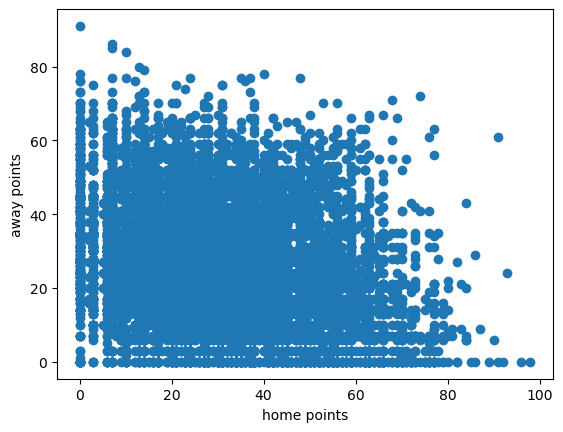

In [28]:
plt.scatter(data['home_points'], data['away_points'])
plt.xlabel('home points')
plt.ylabel('away points')

# 5.Machine Learning

# Regression Analysis

In [30]:
#Multi output regression by home points and away points and predict their probablilty

In [31]:
x=data[['home_points','away_points']]
y=data[['home_post_win_prob','away_post_win_prob']]

In [32]:
x.shape


(20841, 2)

In [33]:
y.shape

(20841, 2)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape

(16672, 2)

In [37]:
y_train.shape

(16672, 2)

# Create a multi-output regressor using RandomForestRegressor as the base estimator

In [38]:
# Create a multi-output regressor using RandomForestRegressor as the base estimator
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

base_regressor = RandomForestRegressor(random_state=42)
multioutput_regressor = MultiOutputRegressor(base_regressor)

# Train the multi-output regressor on the training data
multioutput_regressor.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [39]:
multioutput_regressor.score(X_train, y_train)

0.45689010389720086

In [40]:
multioutput_regressor.score(X_test, y_test)

0.26874559339796333

In [41]:
# Make predictions on the test data
predictions = multioutput_regressor.predict(X_test)
predictions

array([[0.49786612, 0.65489008],
       [0.57490608, 0.59511158],
       [0.72874778, 0.46568   ],
       ...,
       [0.87706628, 0.20934822],
       [0.63890498, 0.4812204 ],
       [0.55917407, 0.55984409]])

# Evaluation Metrics

In [42]:
# Calculate mean squared error for each target variable
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.059635551434699965


In [43]:
# Calculate MAE MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.1969226264672223


In [44]:
from sklearn.metrics import r2_score
# Calculate R-squared
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)

R-squared: 0.26874559339796333


Demonstrate model fitting and evaluation metric

In [50]:
data['home_team'].unique

<bound method Series.unique of 0              Kent State
1          South Carolina
2             Wake Forest
3        Western Illinois
4                     UCF
               ...       
20836                UTEP
20837    New Mexico State
20838              Nevada
20839             Hawai'i
20840                Army
Name: home_team, Length: 20841, dtype: object>

In [52]:
x=data[['season','home_id','away_id']]
y=data[['home_points','away_points']]

In [53]:
x.shape

(20841, 3)

In [57]:
y.shape

(20841, 2)

In [60]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x)
Y = sc_y.fit_transform(y)

In [61]:
print(X)

[[-1.76246754 -0.01535859 -0.0550794 ]
 [-1.76246754  0.00835521 -0.21343283]
 [-1.76246754 -0.20462984 -0.04266949]
 ...
 [ 1.19796655 -0.003853   -0.0248892 ]
 [ 1.19796655 -0.2127101  -0.22192382]
 [ 1.19796655 -0.18750321 -0.0484753 ]]


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [63]:
X_train.shape

(16672, 3)

# Multioutput Regressor with Random Forest Base

In [64]:
# Create a multi-output regressor using RandomForestRegressor as the base estimator
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

base_regressor = RandomForestRegressor(random_state=42)
multioutput_regressor = MultiOutputRegressor(base_regressor)

# Train the multi-output regressor on the training data
multioutput_regressor.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [65]:
multioutput_regressor.score(X_train, y_train)

0.8685325161169188

In [66]:
multioutput_regressor.score(X_test, y_test)

0.09199014669509353

In [67]:
#Overfit here I use home id and away id instead of team 

# Multiple Linear Regression

In [71]:
x2=data[['season','home_id']]
y2=data['home_points']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [75]:
#training the data set
from sklearn.linear_model import LinearRegression
regress=LinearRegression()
regress.fit(X_train,y_train)

LinearRegression()

In [76]:
regress.score(X_train,y_train)

0.0031883366810028235

In [80]:
# Make predictions on the test data
predictions = regress.predict(X_test)
predictions

array([29.83828259, 30.45549128, 31.35573889, ..., 29.62407807,
       30.12703405, 30.53316061])

In [81]:
# Calculate mean squared error for each target variable
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 218.78665452098704


In [82]:
data['season'].dtype

dtype('int64')